# Kernel Ridge Regression Analysis

This Jupyter Notebook demonstrates the process of performing Kernel Ridge Regression on a dataset retrieved from a remote database. The notebook includes the following steps:

1. **Importing Necessary Libraries**: Importing essential libraries and modules required for data manipulation, database connection, and kernel ridge regression.
2. **Database Connection**: Establishing a connection to a remote database to fetch the desired dataset.
3. **Data Preparation**: Loading the dataset into a pandas DataFrame and preparing the data for regression analysis.
4. **Kernel Functions**: Defining various kernel functions such as Gaussian, Polynomial, Linear, and Logistic kernels.
5. **Kernel Ridge Regression**: Applying Kernel Ridge Regression using the defined kernel functions and visualizing the results.

This notebook is designed to provide a comprehensive guide for performing Kernel Ridge Regression, making it easier for readers to understand and implement the process in their own projects.

In [ ]:
import sys
sys.path.append('..')
import os
import dotenv
import mysql.connector
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.kernel_ridge import KernelRidge

In [ ]:
dotenv.load_dotenv()

#### Connection to remote database

In [ ]:
dict_data_frame = {1: ('df_regresion_nolineal_1','x','y'),
                   2: ('df_regresion_nolineal_2','x','y'),
                   3: ('df_regresion_nolineal_3','x','y'),
                   4: ('temp','fecha','temp'),}
desired_dataset = 4

In [ ]:
connection = mysql.connector.connect(
    host=os.getenv('DB_HOST'),
    user=os.getenv('DB_USER'),
    password=os.getenv('DB_PASSWORD'),
    database=os.getenv('DB_NAME')
)

In [ ]:
cursor = connection.cursor()
cursor.execute('SELECT * FROM {}'.format("sistemas_inteligentes_iv."+ dict_data_frame[desired_dataset][0]))
datos = cursor.fetchall()
cursor.close()
connection.close()

In [ ]:
data_frame = pd.DataFrame(datos, columns=['id', dict_data_frame[desired_dataset][1], dict_data_frame[desired_dataset][2]])
data_frame.drop(columns=['id'], inplace=True)
print(data_frame.head())

In [ ]:
y = data_frame[dict_data_frame[desired_dataset][2]].to_numpy()
x = data_frame[dict_data_frame[desired_dataset][1]].to_numpy().reshape(-1, 1)

if desired_dataset == 4:
    x = x[0:-1:4]
    y = y[0:-1:4]
x.shape, y.shape

In [55]:
data_frame = pd.read_csv(r"C:\github\kernel-ridge\datasets\temp.csv")

x = data_frame['x'].to_numpy().reshape(-1,1)
y = data_frame['y'].to_numpy()

x = x[0:-1:5]
y = y[0:-1:5]
x

array([[1.0000e+00],
       [6.0000e+00],
       [1.1000e+01],
       ...,
       [2.2756e+04],
       [2.2761e+04],
       [2.2766e+04]], shape=(4554, 1))

Train score:  0.9972264871377107
Test score:  0.997262630228926


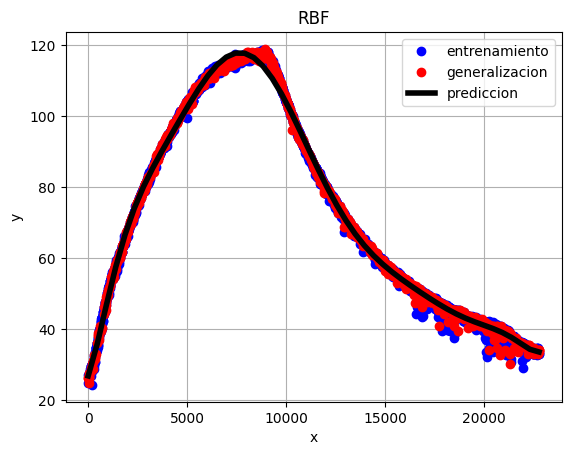

In [ ]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y)

# Create a pipeline with a standard scaler and kernel ridge regression model
model = Pipeline([
    ('scaler', StandardScaler()),
    ('reg', KernelRidge(alpha=0.2, kernel='polynomial', degree=10,coef0=1))
])

# Fit the model on the training data
model.fit(x_train, y_train)

# Print the training and testing scores
print('Train score: ', model.score(x_train, y_train))
print('Test score: ', model.score(x_test, y_test))

# Generate predictions for plotting
x_plot = np.linspace(x.min(), x.max(), 50).reshape(-1, 1)
y_plot = model.predict(x_plot)

# Plot the results
plt.figure()
plt.grid()
plt.title('POLY')
plt.xlabel('x')
plt.ylabel('y')

plt.plot(x_train, y_train, 'bo', label='entrenamiento')
plt.plot(x_test, y_test, 'ro', label='generalizacion')
plt.plot(x_plot, y_plot, 'k-', lw=4, label='prediccion')

plt.legend()
plt.show()
